<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Epitope-edit-distance-for-normal-vs-decoy-data" data-toc-modified-id="Epitope-edit-distance-for-normal-vs-decoy-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Epitope edit distance for normal vs decoy data</a></span><ul class="toc-item"><li><span><a href="#Interaction-map-shuffled-negatives" data-toc-modified-id="Interaction-map-shuffled-negatives-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Interaction map shuffled negatives</a></span></li><li><span><a href="#Dual-input-shuffled-negatives" data-toc-modified-id="Dual-input-shuffled-negatives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dual input shuffled negatives</a></span></li><li><span><a href="#Interaction-map-reference-negatives" data-toc-modified-id="Interaction-map-reference-negatives-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Interaction map reference negatives</a></span></li><li><span><a href="#Dual-input-reference-negatives" data-toc-modified-id="Dual-input-reference-negatives-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Dual input reference negatives</a></span></li></ul></li><li><span><a href="#Negative-data-types-for-normal-versus-decoy-data" data-toc-modified-id="Negative-data-types-for-normal-versus-decoy-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Negative data types for normal versus decoy data</a></span><ul class="toc-item"><li><span><a href="#Interaction-map" data-toc-modified-id="Interaction-map-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Interaction map</a></span></li><li><span><a href="#Dual-input" data-toc-modified-id="Dual-input-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dual input</a></span></li></ul></li><li><span><a href="#Position-perturbation" data-toc-modified-id="Position-perturbation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Position perturbation</a></span></li></ul></div>

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
import scipy

from src.scripts.evaluate.visualize import predict_variations
from src.config import PROJECT_ROOT

In [2]:
import json

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from pathlib import Path

from src.config import PROJECT_ROOT
from src.scripts.preprocessing import preprocess_vdjdb

In [3]:
plt.rcParams.update({"font.size": 14})  # 20})
# plt.rcParams["title_fontsize"] = 10
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Source Sans Pro"  # ['Fira Sans', 'Source Sans Pro']
font = {"weight": "normal"}  # ,'size'   : 22}

# Epitope edit distance for normal vs decoy data

## Interaction map shuffled negatives

In [4]:
directory = PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-decoy"
decoy_metrics = pd.read_csv(directory / "Interaction map - TRB - epitope-grouped - shuffled negatives - decoy/2020-06-15_21-40-57_evaluate_test_folds/metrics_per_epitope.csv")
normal_metrics = pd.read_csv(directory / "Interaction map - TRB - epitope-grouped - shuffled negatives/2020-06-24_19-47-35_evaluate_test_folds/metrics_per_epitope.csv")

Text(0.5, 1.0, 'r=-0.298193, p=0.013517')

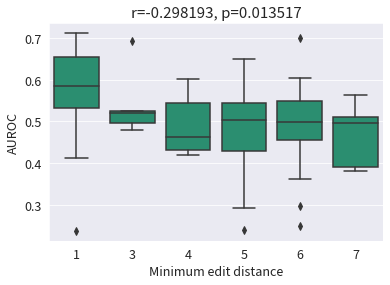

In [5]:
eval_df = normal_metrics
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

g = sns.boxplot(
    y="roc_auc", x="min_dist", data=eval_df, color=sns.color_palette("Dark2")[0],
)
# sns.swarmplot(y="roc_auc", x="min_dist", data=eval_df, color=".25")
g.set_xlabel("Minimum edit distance")
g.set_ylabel("AUROC")

r, p = scipy.stats.spearmanr(eval_df["roc_auc"], eval_df["min_dist"])
# annot_kws = {"prop": {"family": "monospace", "weight": "bold", "size": 15}}
# phantom = g.plot([], [], linestyle="", alpha=0)
# g.legend([phantom], ["r={:f}, p={:f}".format(r, p)], **annot_kws)
g.set_title("r={:f}, p={:f}".format(r, p))

In [6]:
decoy_metrics_nodist = decoy_metrics
decoy_metrics_nodist["min_dist"] = 0
decoy_metrics_nodist["decoy"] = True
normal_metrics["decoy"] = False

Text(0.5, 1.0, 'r=-0.105567, p=0.228319')

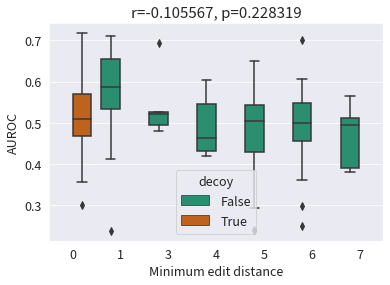

In [7]:
eval_df = pd.concat([decoy_metrics_nodist, normal_metrics])
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

g = sns.boxplot(
    y="roc_auc", x="min_dist", data=eval_df, hue="decoy", palette=sns.color_palette("Dark2"),
)
# sns.swarmplot(y="roc_auc", x="min_dist", data=eval_df, color=".25")
g.set_xlabel("Minimum edit distance")
g.set_ylabel("AUROC")

r, p = scipy.stats.spearmanr(eval_df["roc_auc"], eval_df["min_dist"])
# annot_kws = {"prop": {"family": "monospace", "weight": "bold", "size": 15}}
# phantom = g.plot([], [], linestyle="", alpha=0)
# g.legend([phantom], ["r={:f}, p={:f}".format(r, p)], **annot_kws)
g.set_title("r={:f}, p={:f}".format(r, p))

/home/pieter/miniconda3/envs/deepTCR/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


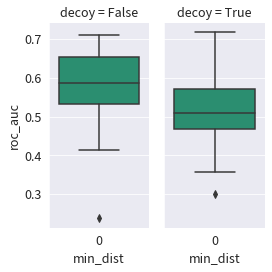

In [8]:
g = sns.FacetGrid(eval_df, col="decoy", height=4, aspect=.5)
g.map(sns.boxplot, "min_dist", "roc_auc");

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


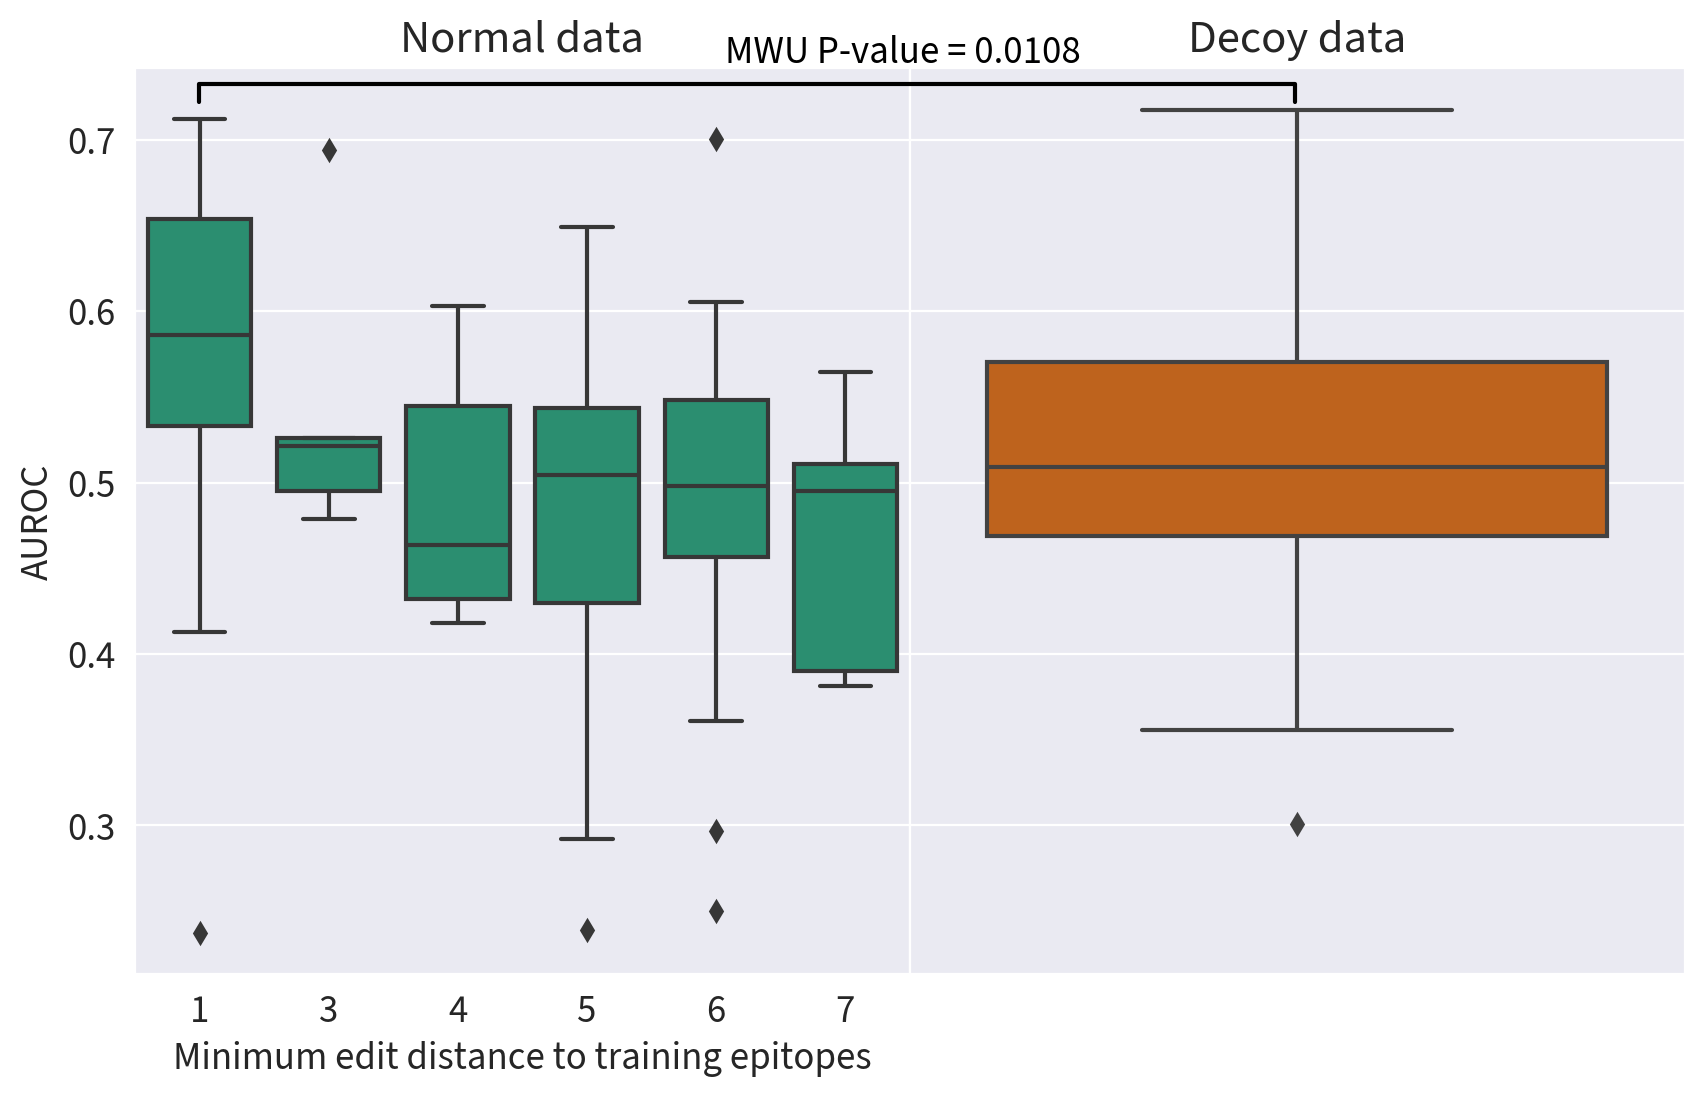

In [9]:
fig, axes = plt.subplots(1,2,sharey=True, figsize=(10, 6), dpi=200)

ax1=sns.boxplot(y="roc_auc", x="min_dist", data=eval_df[eval_df["decoy"]==False],
           color=sns.color_palette("Dark2")[0], ax=axes[0])
# sns.swarmplot(x="min_dist", y="roc_auc", data=eval_df[eval_df["decoy"]==False], color=".25",ax=axes[0])
ax2=sns.boxplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True],
           color=sns.color_palette("Dark2")[1], ax=axes[1])
# sns.swarmplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True], color=".25",ax=axes[1])
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.ylabel("Common Y-Axis")
# plt.setp(axes[:], ylabel='y axis label')
ax1.set_title('Normal data')
ax2.set_title('Decoy data')
ax1.set_ylabel("AUROC")
ax2.set_ylabel("")
ax1.set_xlabel('Minimum edit distance to training epitopes')

# statistical annotation
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .14, .015, 'k'
# y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0.157, .705
line = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
fig.lines = line,

m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 1), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

plt.text(-x1-x2/2, x2*1.05, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-map-decoy-min-dist-aurroc-boxplot.pdf")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-map-decoy-min-dist-aurroc-boxplot.png")

## Dual input shuffled negatives

In [10]:
directory = PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-dual-decoy"
decoy_metrics = pd.read_csv(directory / "Dual input - TRB - epitope-grouped - shuffled negatives - decoy/2020-06-15_18-18-37_evaluate_test_folds/metrics_per_epitope.csv")
normal_metrics = pd.read_csv(directory / "Dual input - TRB - epitope-grouped - shuffled negatives/2020-06-15_18-10-19_evaluate_test_folds/metrics_per_epitope.csv")

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


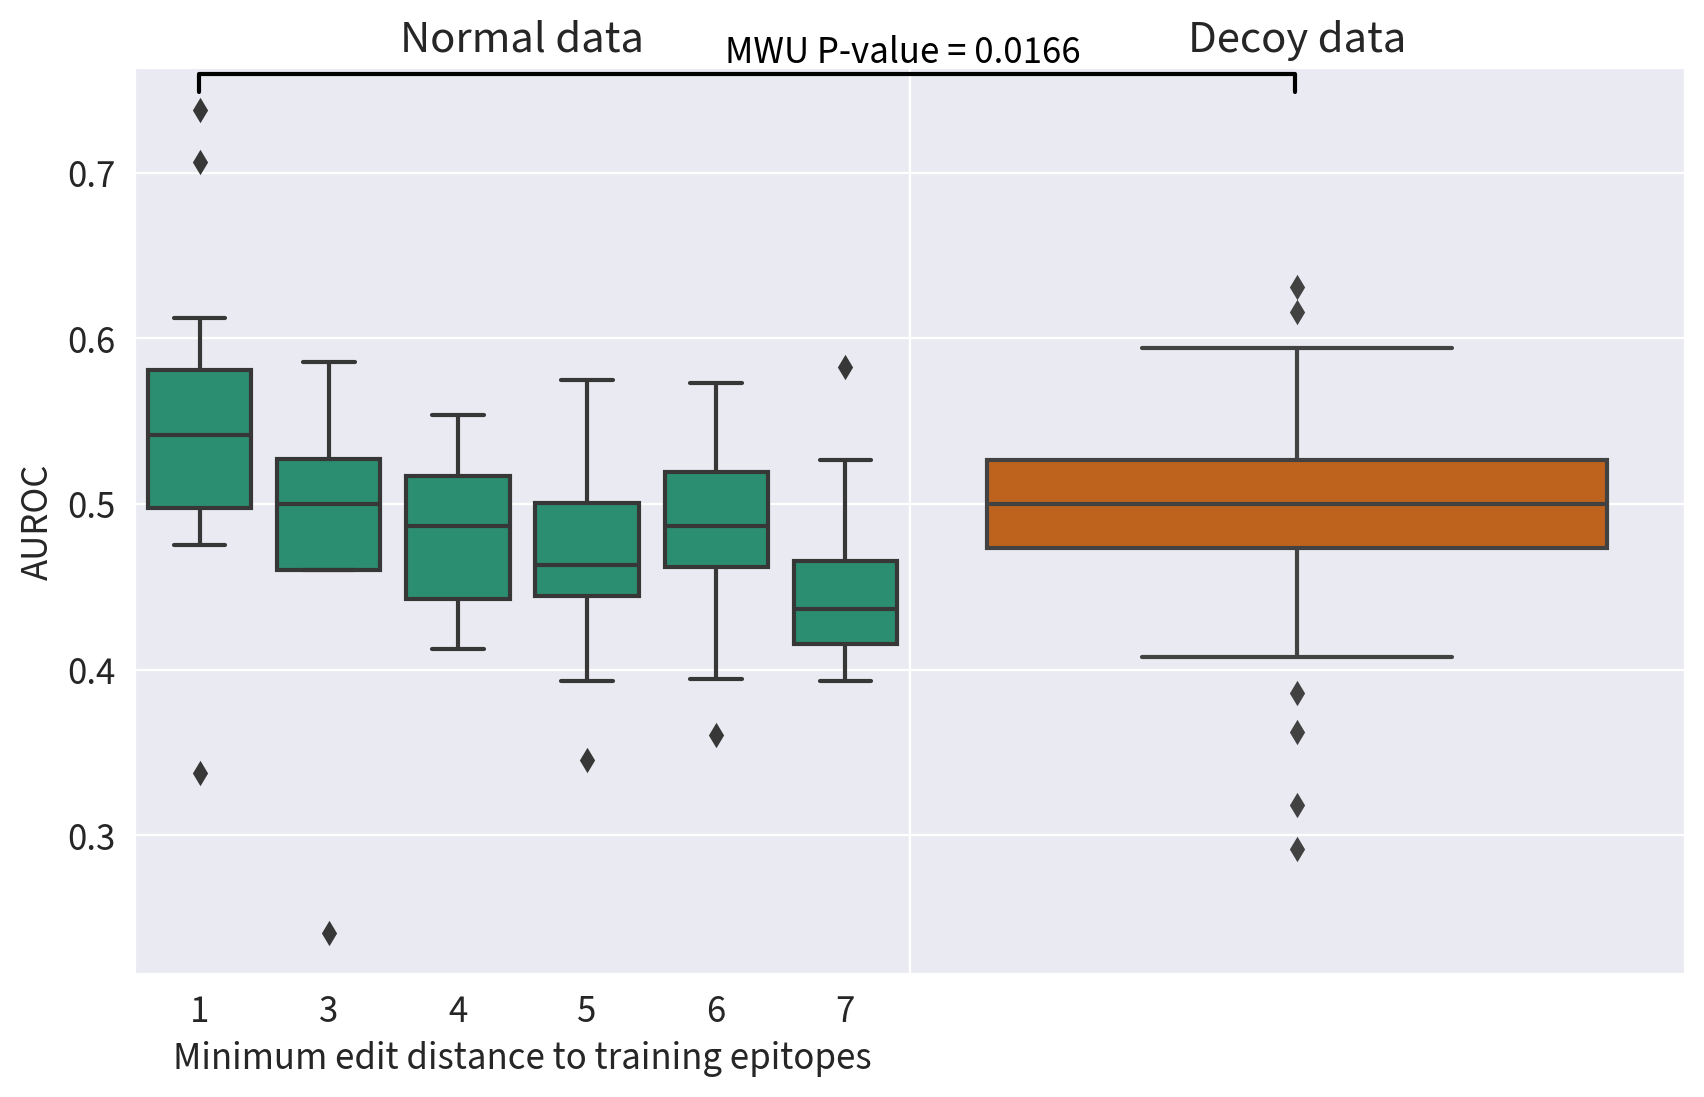

In [11]:
decoy_metrics_nodist = decoy_metrics
decoy_metrics_nodist["min_dist"] = 0
decoy_metrics_nodist["decoy"] = True
normal_metrics["decoy"] = False

eval_df = pd.concat([decoy_metrics_nodist, normal_metrics])
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey=True, figsize=(10, 6), dpi=200)

ax1=sns.boxplot(y="roc_auc", x="min_dist", data=eval_df[eval_df["decoy"]==False],
           color=sns.color_palette("Dark2")[0], ax=axes[0])
# sns.swarmplot(x="min_dist", y="roc_auc", data=eval_df[eval_df["decoy"]==False], color=".25",ax=axes[0])
ax2=sns.boxplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True],
           color=sns.color_palette("Dark2")[1], ax=axes[1])
# sns.swarmplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True], color=".25",ax=axes[1])
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.ylabel("Common Y-Axis")
# plt.setp(axes[:], ylabel='y axis label')
ax1.set_title('Normal data')
ax2.set_title('Decoy data')
ax1.set_ylabel("AUROC")
ax2.set_ylabel("")
ax1.set_xlabel('Minimum edit distance to training epitopes')

# statistical annotation
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .122, .015, 'k'
# y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0.157, .705
line = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
fig.lines = line,

m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 1), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

plt.text(-x1-x2/2, x2*1.08, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-dual-decoy-min-dist-aurroc-boxplot.pdf")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shuffle-dual-decoy-min-dist-aurroc-boxplot.png")

## Interaction map reference negatives

In [12]:
directory = PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-negref-map-decoy"
decoy_metrics = pd.read_csv(directory / "Interaction map - TRB - epitope-grouped - reference negatives - decoy/2020-06-15_21-41-50_evaluate_test_folds/metrics_per_epitope.csv")
normal_metrics = pd.read_csv(directory / "Interaction map - TRB - epitope-grouped - reference negatives/2020-06-15_21-59-12_evaluate_test_folds/metrics_per_epitope.csv")

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


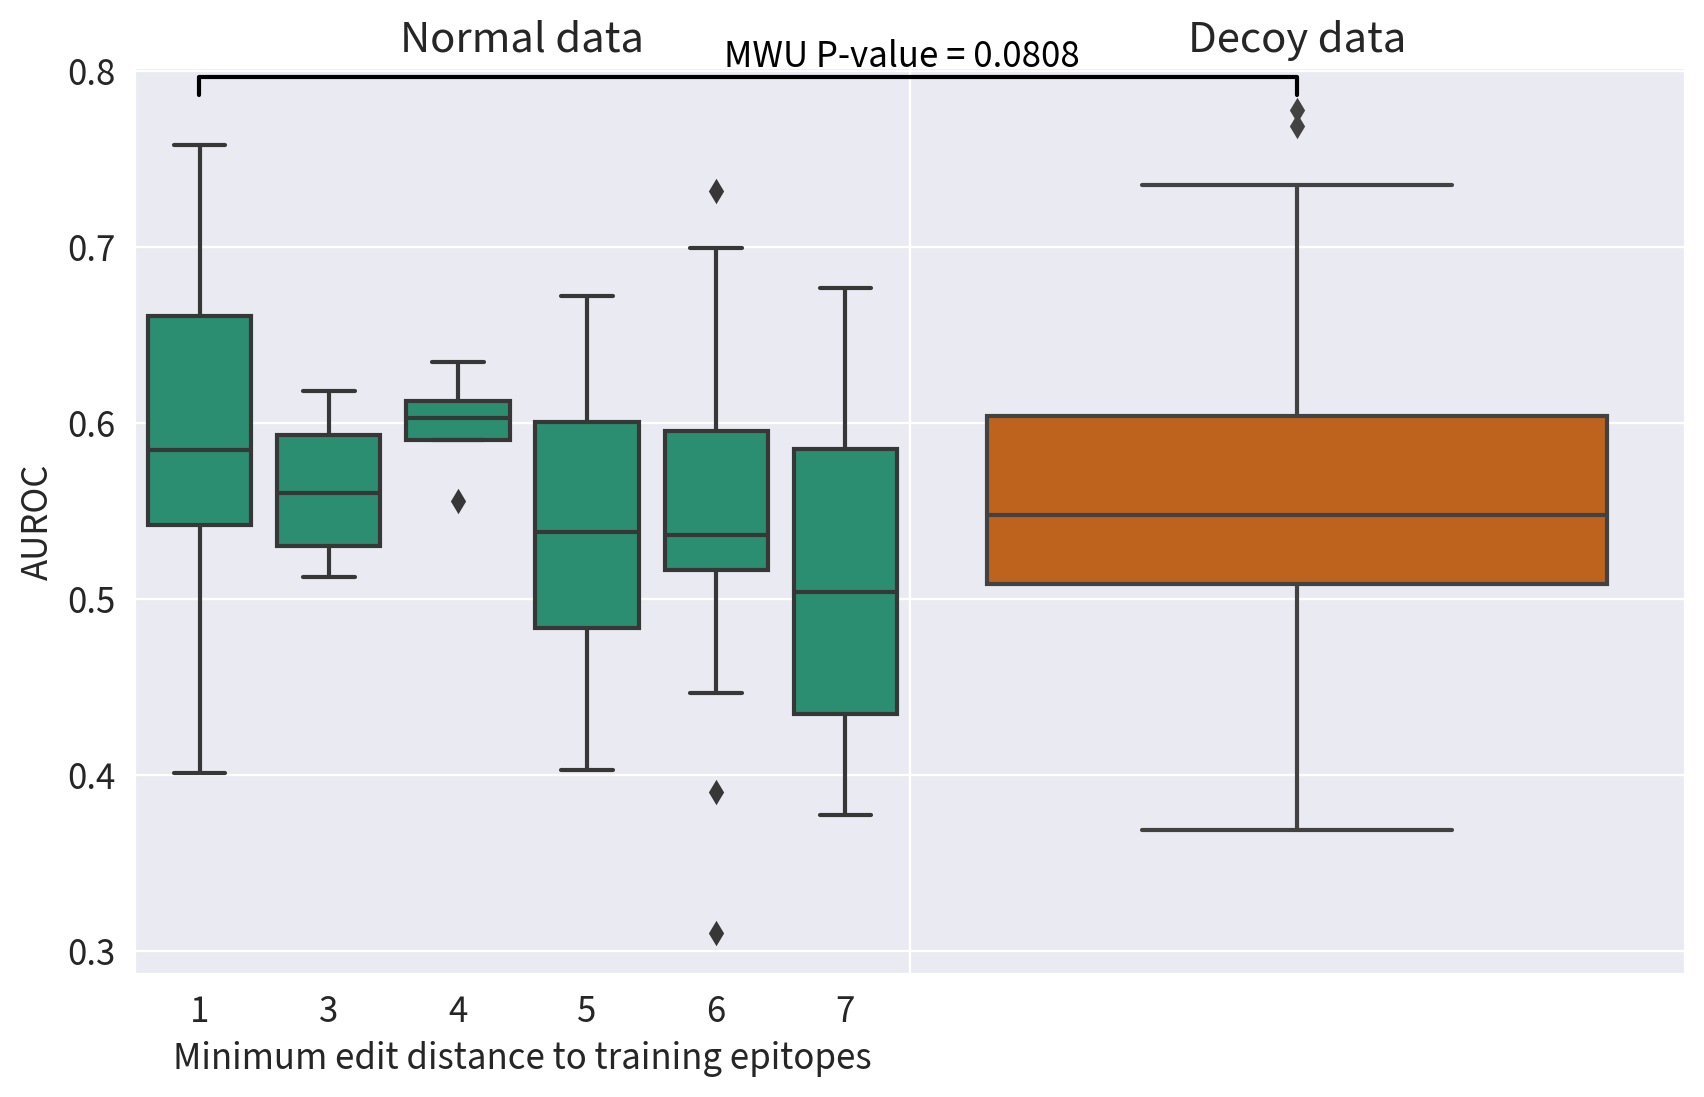

In [13]:
decoy_metrics_nodist = decoy_metrics
decoy_metrics_nodist["min_dist"] = 0
decoy_metrics_nodist["decoy"] = True
normal_metrics["decoy"] = False

eval_df = pd.concat([decoy_metrics_nodist, normal_metrics])
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey=True, figsize=(10, 6), dpi=200)

ax1=sns.boxplot(y="roc_auc", x="min_dist", data=eval_df[eval_df["decoy"]==False],
           color=sns.color_palette("Dark2")[0], ax=axes[0])
# sns.swarmplot(x="min_dist", y="roc_auc", data=eval_df[eval_df["decoy"]==False], color=".25",ax=axes[0])
ax2=sns.boxplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True],
           color=sns.color_palette("Dark2")[1], ax=axes[1])
# sns.swarmplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True], color=".25",ax=axes[1])
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.ylabel("Common Y-Axis")
# plt.setp(axes[:], ylabel='y axis label')
ax1.set_title('Normal data')
ax2.set_title('Decoy data')
ax1.set_ylabel("AUROC")
ax2.set_ylabel("")
ax1.set_xlabel('Minimum edit distance to training epitopes')

# statistical annotation
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .015, 'k'
# y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0.157, .706
line = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
fig.lines = line,

m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 1), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

plt.text(-x1-x2/2, x2*1.13, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-negref-map-decoy-min-dist-aurroc-boxplot.pdf")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-negref-map-decoy-min-dist-aurroc-boxplot.png")

## Dual input reference negatives

In [14]:
directory = PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-negref-dual-decoy"
decoy_metrics = pd.read_csv(directory / "Dual input - TRB - epitope-grouped - reference negatives - decoy/2020-06-15_18-19-29_evaluate_test_folds/metrics_per_epitope.csv")
normal_metrics = pd.read_csv(directory / "Dual input - TRB - epitope-grouped - reference negatives/2020-06-15_18-11-13_evaluate_test_folds/metrics_per_epitope.csv")

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


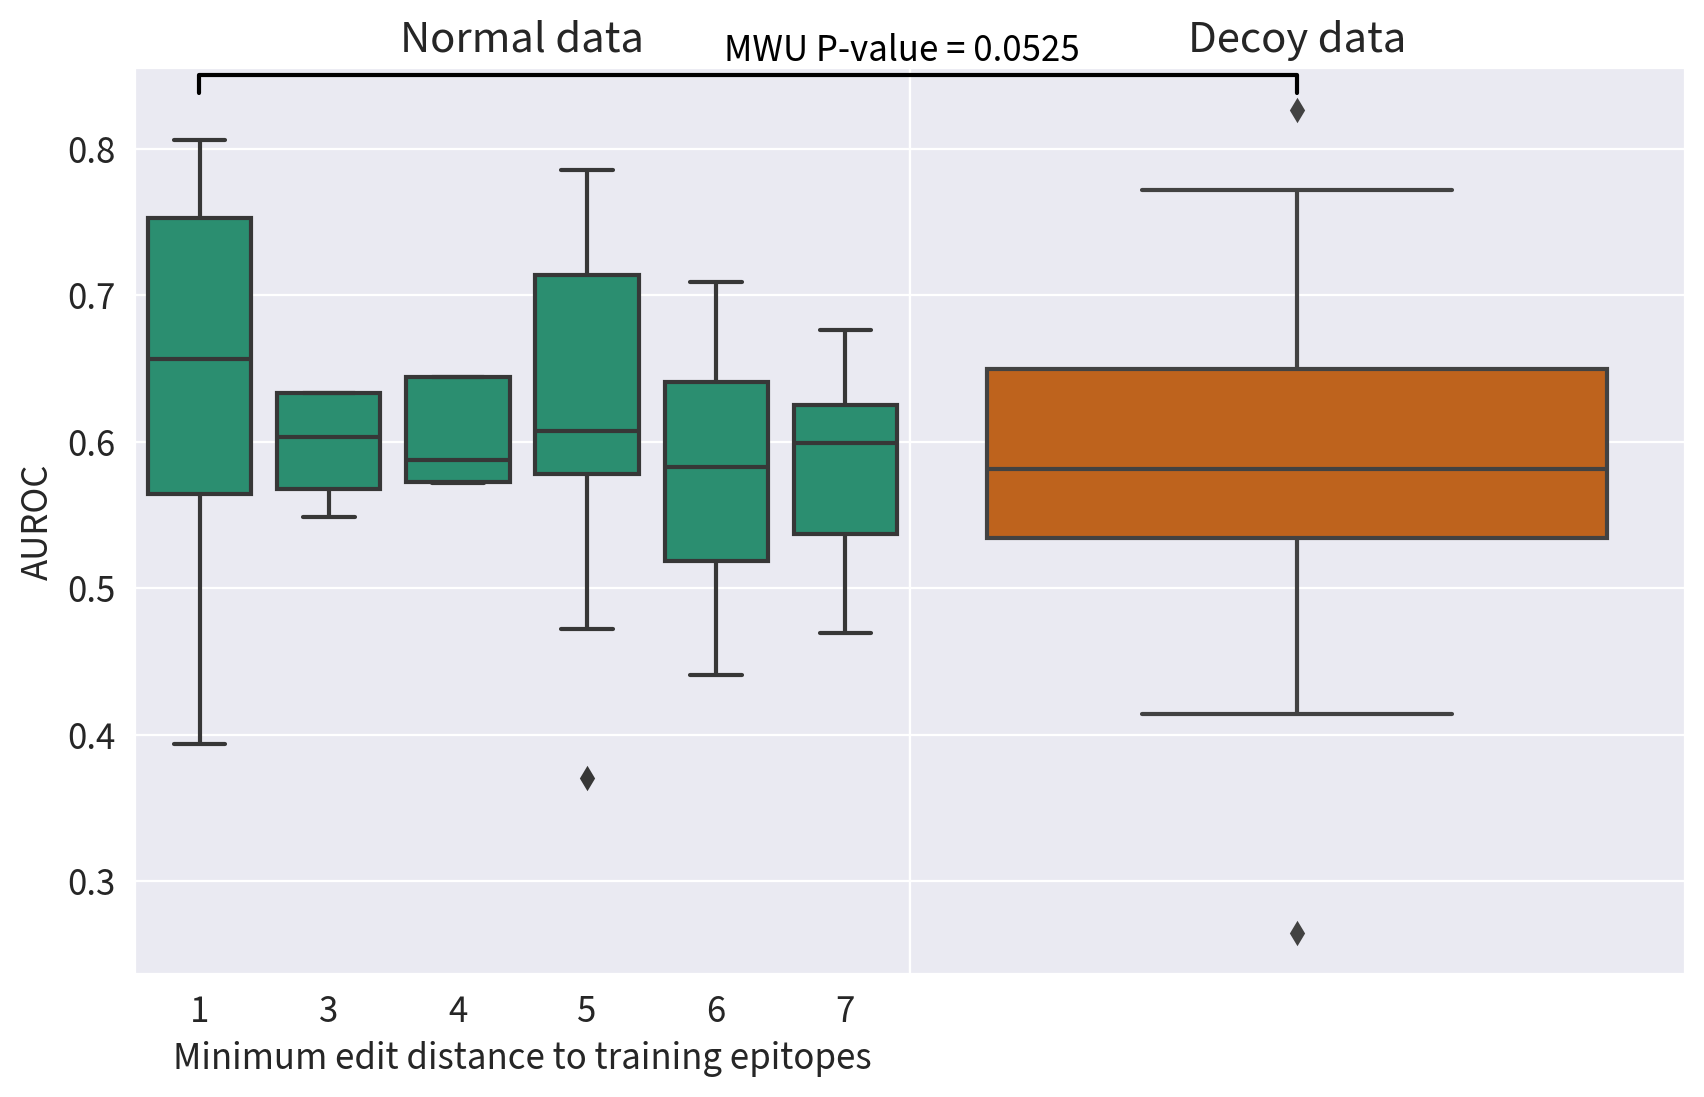

In [15]:
decoy_metrics_nodist = decoy_metrics
decoy_metrics_nodist["min_dist"] = 0
decoy_metrics_nodist["decoy"] = True
normal_metrics["decoy"] = False

eval_df = pd.concat([decoy_metrics_nodist, normal_metrics])
eval_df["n"] = eval_df.pos_data + eval_df.neg_data
eval_df = eval_df[eval_df["n"] >= 30].reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey=True, figsize=(10, 6), dpi=200)

ax1=sns.boxplot(y="roc_auc", x="min_dist", data=eval_df[eval_df["decoy"]==False],
           color=sns.color_palette("Dark2")[0], ax=axes[0])
# sns.swarmplot(x="min_dist", y="roc_auc", data=eval_df[eval_df["decoy"]==False], color=".25",ax=axes[0])
ax2=sns.boxplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True],
           color=sns.color_palette("Dark2")[1], ax=axes[1])
# sns.swarmplot(y="roc_auc", data=eval_df[eval_df["decoy"]==True], color=".25",ax=axes[1])
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.ylabel("Common Y-Axis")
# plt.setp(axes[:], ylabel='y axis label')
ax1.set_title('Normal data')
ax2.set_title('Decoy data')
ax1.set_ylabel("AUROC")
ax2.set_ylabel("")
ax1.set_xlabel('Minimum edit distance to training epitopes')

# statistical annotation
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = eval_df["roc_auc"].max() + .033, .015, 'k'
# y, h, col = eval_df.loc[eval_df["decoy"]==False, "roc_auc"].max() + .1, .1, 'k'
# ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# ax1.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0.157, .706
line = lines.Line2D([x1, x1, x2, x2], [y, y+h, y+h, y],transform=fig.transFigure, color='k')
fig.lines = line,

m,p = scipy.stats.mannwhitneyu(eval_df.loc[ (eval_df["decoy"]==False) & (eval_df["min_dist"] == 1), "roc_auc"], eval_df.loc[eval_df["decoy"]==True, "roc_auc"])

plt.text(-x1-x2/2, x2*1.21, f"MWU P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-negref-dual-decoy-min-dist-aurroc-boxplot.pdf")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-negref-dual-decoy-min-dist-aurroc-boxplot.png")

# Negative data types for normal versus decoy data

## Interaction map

In [21]:
directory = PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shufflenegref-map-decoy"

In [22]:
df = pd.read_csv(directory / "auc_per_iteration.csv")

In [24]:
df.type.unique()

array(['Interaction map - TRB - epitope-grouped - reference negatives',
       'Interaction map - TRB - epitope-grouped - reference negatives - decoy',
       'Interaction map - TRB - epitope-grouped - shuffled negatives',
       'Interaction map - TRB - epitope-grouped - shuffled negatives - decoy'],
      dtype=object)

In [26]:
unique_values = sorted(df["type"].unique())

# if len(unique_values) < 8:
#     pal = custom_palette
# else:
#     pal = sns.color_palette("Set1", n_colors=len(unique_values))

pal = sns.color_palette("Dark2", n_colors=len(unique_values))

palette_dict = dict(zip(unique_values, pal))

In [27]:
# labels = list()
for tpe in df.type.unique():
    df_label = df[df.type == tpe]
    auc_mean = df_label.auc.mean()
    auc_std = df_label.auc.std()
    model_name = (
        f"{tpe}\n"
        + r"($\overline{AUROC}$"
        + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
        + r"$s$)"
    )
    # labels.append(model_name)
    # labels = [fill(l, 50) for l in labels]

    df.loc[df.type == tpe, "type-mean-std"] = model_name

In [28]:
negref = ['Interaction map - TRB - epitope-grouped - reference negatives',
       'Interaction map - TRB - epitope-grouped - reference negatives - decoy']
shuffle = ['Interaction map - TRB - epitope-grouped - shuffled negatives',
       'Interaction map - TRB - epitope-grouped - shuffled negatives - decoy']

[[]]

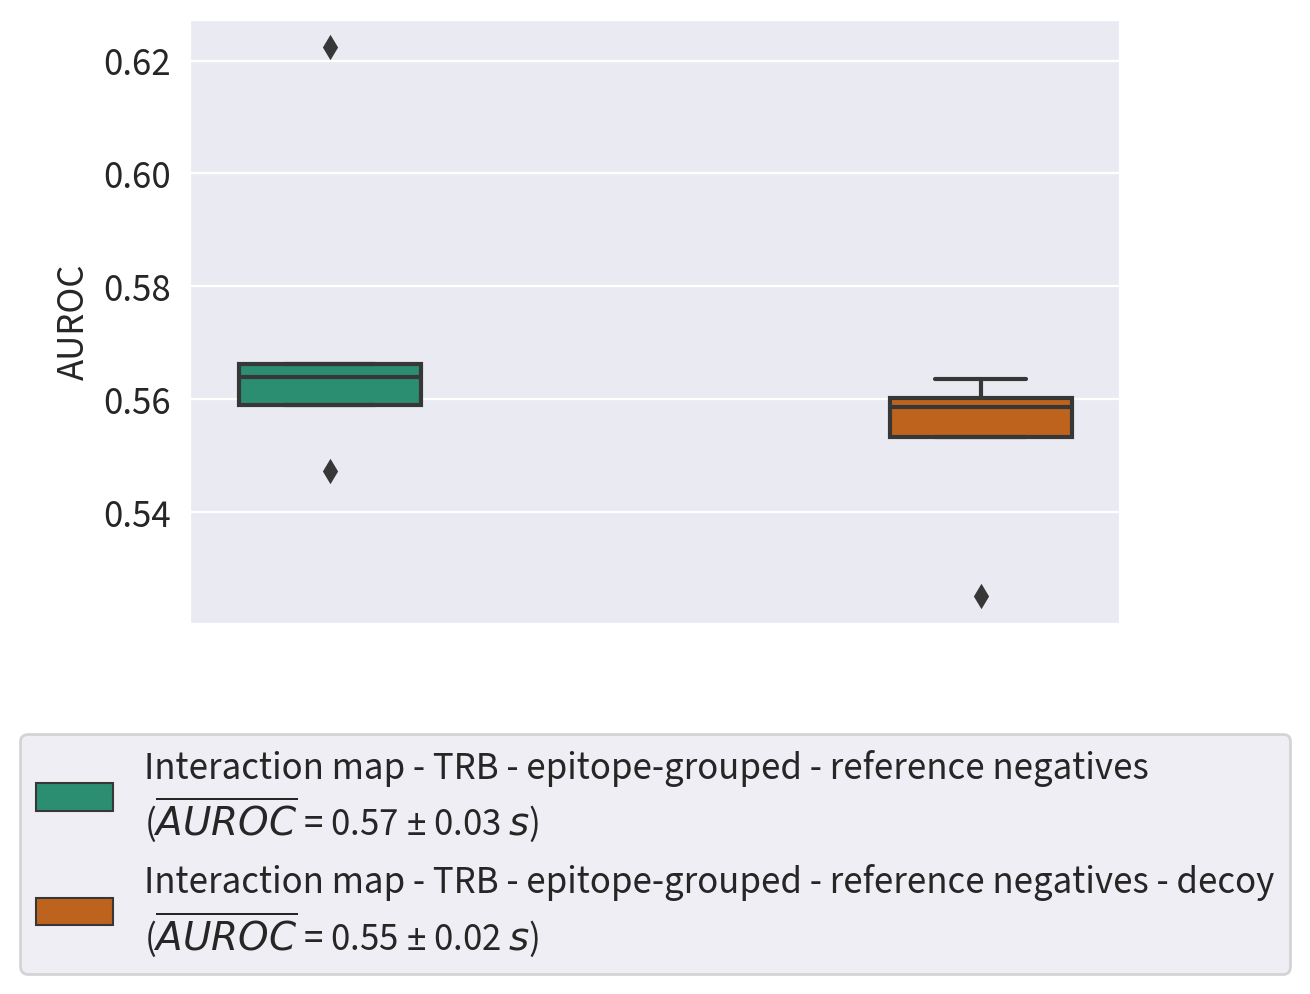

In [33]:
fig, ax = plt.subplots(constrained_layout=False, dpi=200)  # , figsize=(12,16))

sns_plot = sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(negref)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(negref), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
)


plt.setp(
    ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default",
)

plt.xlabel(None)
plt.ylabel("AUROC")

# for patch in ax.artists:
#     r, g, b, a = patch.get_facecolor()
#     patch.set_facecolor((r, g, b, 0.7))
# plt/sns_plot.legend() overrides custom legend
# for lh in plt.legend().legendHandles:
#     lh.set_alpha(0.7)

# add legend and remove x labels
# must be called after setting alpha or it will override location again
## ax.legend()

# legend below figure, requires hue to be set
sns_plot.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
sns_plot.set(xticklabels=[])

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


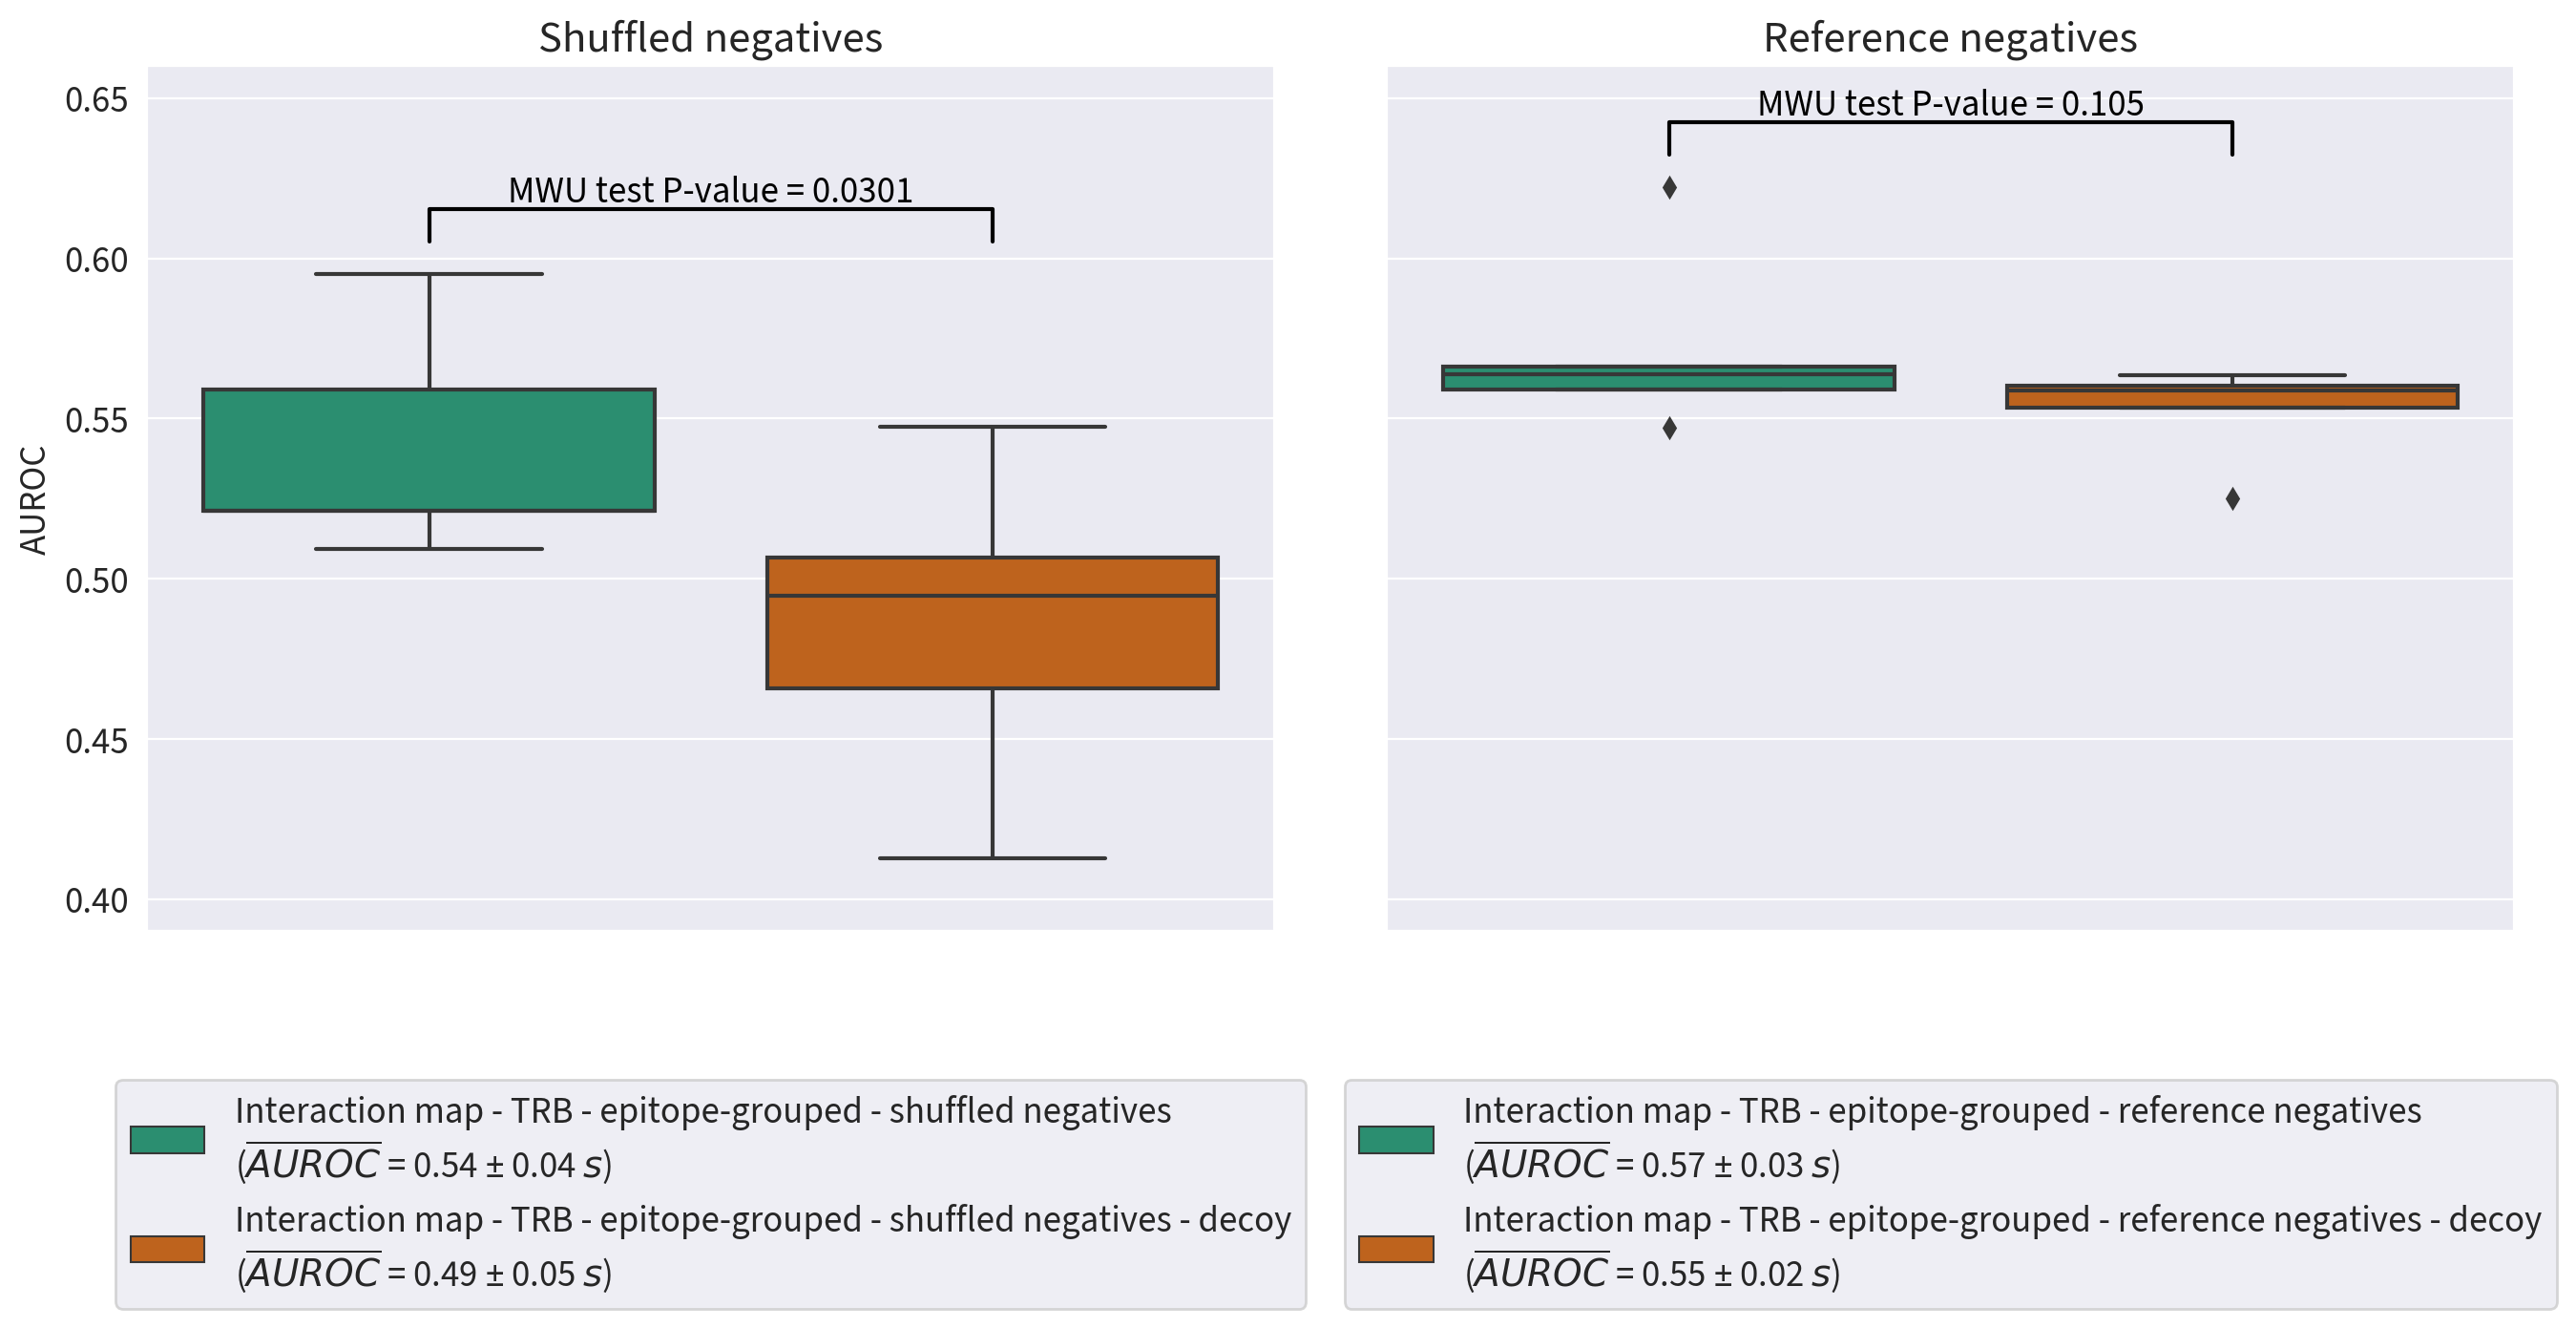

In [191]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(16, 6), dpi=200, constrained_layout=False)

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(negref)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(negref), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[1],
    dodge=False
)
axes[1].set_title("Reference negatives")

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(shuffle)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(shuffle), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[0],
    dodge=False
)
axes[0].set_title("Shuffled negatives")

for ax in axes:
#     plt.setp(ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default")
    ax.set_xlabel(None)
    ax.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
    ax.set_xticks([])

axes[0].set_ylabel("AUROC")
plt.ylabel(None)
plt.subplots_adjust(wspace=0.1)

plt.setp(axes, ylim=(0.39,0.66))


# Compute p-values

## shuffle

# sort the values
df_shuffle = df.loc[df["type"].isin(shuffle)].sort_values(["iteration", "type"]).reset_index(drop=True)
# and calculate the difference in auroc between the model types per iteration
# df_shuffle["diff"] = df_shuffle.groupby("iteration")["auc"].transform(lambda x: x.diff())

# # wilcoxon signed rank test
# # compute wilcoxon test and add p-value to legend
# p = scipy.stats.wilcoxon(df_shuffle["diff"].dropna(), correction=True, mode="exact")[1]
# # ax.legend(title=r"Wilcoxon signed-rank test $P-value =$ " + str(round(p, 4)),)

# # sign test
# x = (df_shuffle["diff"].dropna() > 0).sum()
# n = len(df_shuffle["diff"].dropna())
# p = scipy.stats.binom_test(x, n, 0.5, alternative="two-sided")
# # ax.legend(title=f"Sign test {p}")

# MWU test
auroc_lists = [df_shuffle.loc[df_shuffle["type"] == i, "auc"] for i in df_shuffle["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[0].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks()) use dodge=False to line up
y, h, col = df_shuffle.auc.max() + .01, .01, 'k'
axes[0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[0].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)


## negref
df_negref = df.loc[df["type"].isin(negref)].sort_values(["iteration", "type"]).reset_index(drop=True)
# df_negref["diff"] = df_negref.groupby("iteration")["auc"].transform(lambda x: x.diff())
auroc_lists = [df_negref.loc[df_negref["type"] == i, "auc"] for i in df_negref["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[1].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))
x1, x2 = 0, 1
y, h, col = df_negref.auc.max() + .01, .01, 'k'
axes[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[1].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shufflenegref-map-decoy-roc-boxplot.pdf")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shufflenegref-map-decoy-roc-boxplot.png")

In [160]:
df_shuffle.auc.max()

0.5952719885293676

In [ ]:
# unique_values = sorted(df["type-mean-std"].unique())

# # if len(unique_values) < 8:
# #     pal = custom_palette
# # else:
# #     pal = sns.color_palette("Set1", n_colors=len(unique_values))

# pal = sns.color_palette("Dark2", n_colors=len(unique_values))

# palette_dict = dict(zip(unique_values, pal))




# fig, ax = plt.subplots(constrained_layout=False, dpi=200)  # , figsize=(12,16))

# # labels = list()
# for tpe in df.type.unique():
#     df_label = df[df.type == tpe]
#     auc_mean = df_label.auc.mean()
#     auc_std = df_label.auc.std()
#     model_name = (
#         f"{tpe}\n"
#         + r"($\overline{AUROC}$"
#         + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
#         + r"$s$)"
#     )
#     # labels.append(model_name)
#     # labels = [fill(l, 50) for l in labels]

#     df.loc[df.type == tpe, "type-mean-std"] = model_name

# sns_plot = sns.boxplot(
#     x="type-mean-std",
#     y="auc",
#     data=df.sort_values(by=["type-mean-std"]),
#     order=sorted(df["type-mean-std"].unique()),
#     palette=pal,
#     hue="type-mean-std",
# )
# # color=palette_single[3])
# # hue="type-mean-std" for legend, optionally use custom labels

# plt.setp(
#     ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default",
# )

# plt.xlabel(None)
# plt.ylabel("AUROC")

# # for patch in ax.artists:
# #     r, g, b, a = patch.get_facecolor()
# #     patch.set_facecolor((r, g, b, 0.7))
# # plt/sns_plot.legend() overrides custom legend
# # for lh in plt.legend().legendHandles:
# #     lh.set_alpha(0.7)

# # add legend and remove x labels
# # must be called after setting alpha or it will override location again
# ## ax.legend()

# # legend below figure, requires hue to be set
# sns_plot.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
# sns_plot.set(xticklabels=[])

In [ ]:
# fig, ax = plt.subplots(constrained_layout=False, dpi=200)  # , figsize=(12,16))
#     df = pd.read_csv(os.path.join(directory, "auc_per_iteration.csv"))

#     # labels = list()
#     for tpe in df.type.unique():
#         df_label = df[df.type == tpe]
#         auc_mean = df_label.auc.mean()
#         auc_std = df_label.auc.std()
#         model_name = (
#             f"{tpe}\n"
#             + r"($\overline{AUROC}$"
#             + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
#             + r"$s$)"
#         )
#         # labels.append(model_name)
#         # labels = [fill(l, 50) for l in labels]

#         df.loc[df.type == tpe, "type-mean-std"] = model_name

#     sns_plot = sns.boxplot(
#         x="type-mean-std",
#         y="auc",
#         data=df.sort_values(by=["type-mean-std"]),
#         order=sorted(df["type-mean-std"].unique()),
#         palette=get_palette(df, "type-mean-std"),
#         hue="type-mean-std",
#     )
#     # color=palette_single[3])
#     # hue="type-mean-std" for legend, optionally use custom labels

#     plt.setp(
#         ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default",
#     )

#     plt.xlabel(None)
#     plt.ylabel("AUROC")

#     # for patch in ax.artists:
#     #     r, g, b, a = patch.get_facecolor()
#     #     patch.set_facecolor((r, g, b, 0.7))
#     # plt/sns_plot.legend() overrides custom legend
#     # for lh in plt.legend().legendHandles:
#     #     lh.set_alpha(0.7)

#     # add legend and remove x labels
#     # must be called after setting alpha or it will override location again
#     ## ax.legend()

#     # legend below figure, requires hue to be set
#     sns_plot.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
#     sns_plot.set(xticklabels=[])

#     # add wmu test

#     if df["type"].nunique() == 2:
#         # sort the values
#         df = df.sort_values(["iteration", "type"]).reset_index(drop=True)
#         # and calculate the difference in auroc between the model types per iteration
#         df["diff"] = df.groupby("iteration")["auc"].transform(lambda x: x.diff())

#         # # wilcoxon signed rank test
#         # # compute wilcoxon test and add p-value to legend
#         # p = scipy.stats.wilcoxon(df["diff"].dropna(), correction=True, mode="exact")[1]
#         # ax.legend(title=r"Wilcoxon signed-rank test $P-value =$ " + str(round(p, 4)),)

#         # # sign test
#         # x = (df["diff"].dropna() > 0).sum()
#         # n = len(df["diff"].dropna())
#         # p = scipy.stats.binom_test(x, n, 0.5, alternative="two-sided")
#         # ax.legend(title=f"Sign test {p}")

#         # MWU test
#         auroc_lists = [df.loc[df["type"] == i, "auc"] for i in df["type"].unique()]
#         p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])  # [1]
#         ax.legend(title=f"MWU test {p}")

#     sns_plot.get_figure().savefig(
#         get_output_path(
#             directory,
#             "roc_boxplot"
#             + "-"
#             + str(Path(directory).absolute().name).replace(" ", "-"),
#         ),
#         bbox_inches="tight",
#     )


## Dual input

In [197]:
directory = PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shufflenegref-dual-decoy"
df = pd.read_csv(directory / "auc_per_iteration.csv")
df.type.unique()

array(['Dual input - TRB - epitope-grouped - reference negatives',
       'Dual input - TRB - epitope-grouped - reference negatives - decoy',
       'Dual input - TRB - epitope-grouped - shuffled negatives',
       'Dual input - TRB - epitope-grouped - shuffled negatives - decoy'],
      dtype=object)

In [198]:
unique_values = sorted(df["type"].unique())
pal = sns.color_palette("Dark2", n_colors=len(unique_values))
palette_dict = dict(zip(unique_values, pal))

# labels = list()
for tpe in df.type.unique():
    df_label = df[df.type == tpe]
    auc_mean = df_label.auc.mean()
    auc_std = df_label.auc.std()
    model_name = (
        f"{tpe}\n"
        + r"($\overline{AUROC}$"
        + " = {:.2f} ± {:.2f} ".format(auc_mean, auc_std)
        + r"$s$)"
    )
    # labels.append(model_name)
    # labels = [fill(l, 50) for l in labels]

    df.loc[df.type == tpe, "type-mean-std"] = model_name

negref = ['Dual input - TRB - epitope-grouped - reference negatives',
       'Dual input - TRB - epitope-grouped - reference negatives - decoy']
shuffle = ['Dual input - TRB - epitope-grouped - shuffled negatives',
       'Dual input - TRB - epitope-grouped - shuffled negatives - decoy']

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


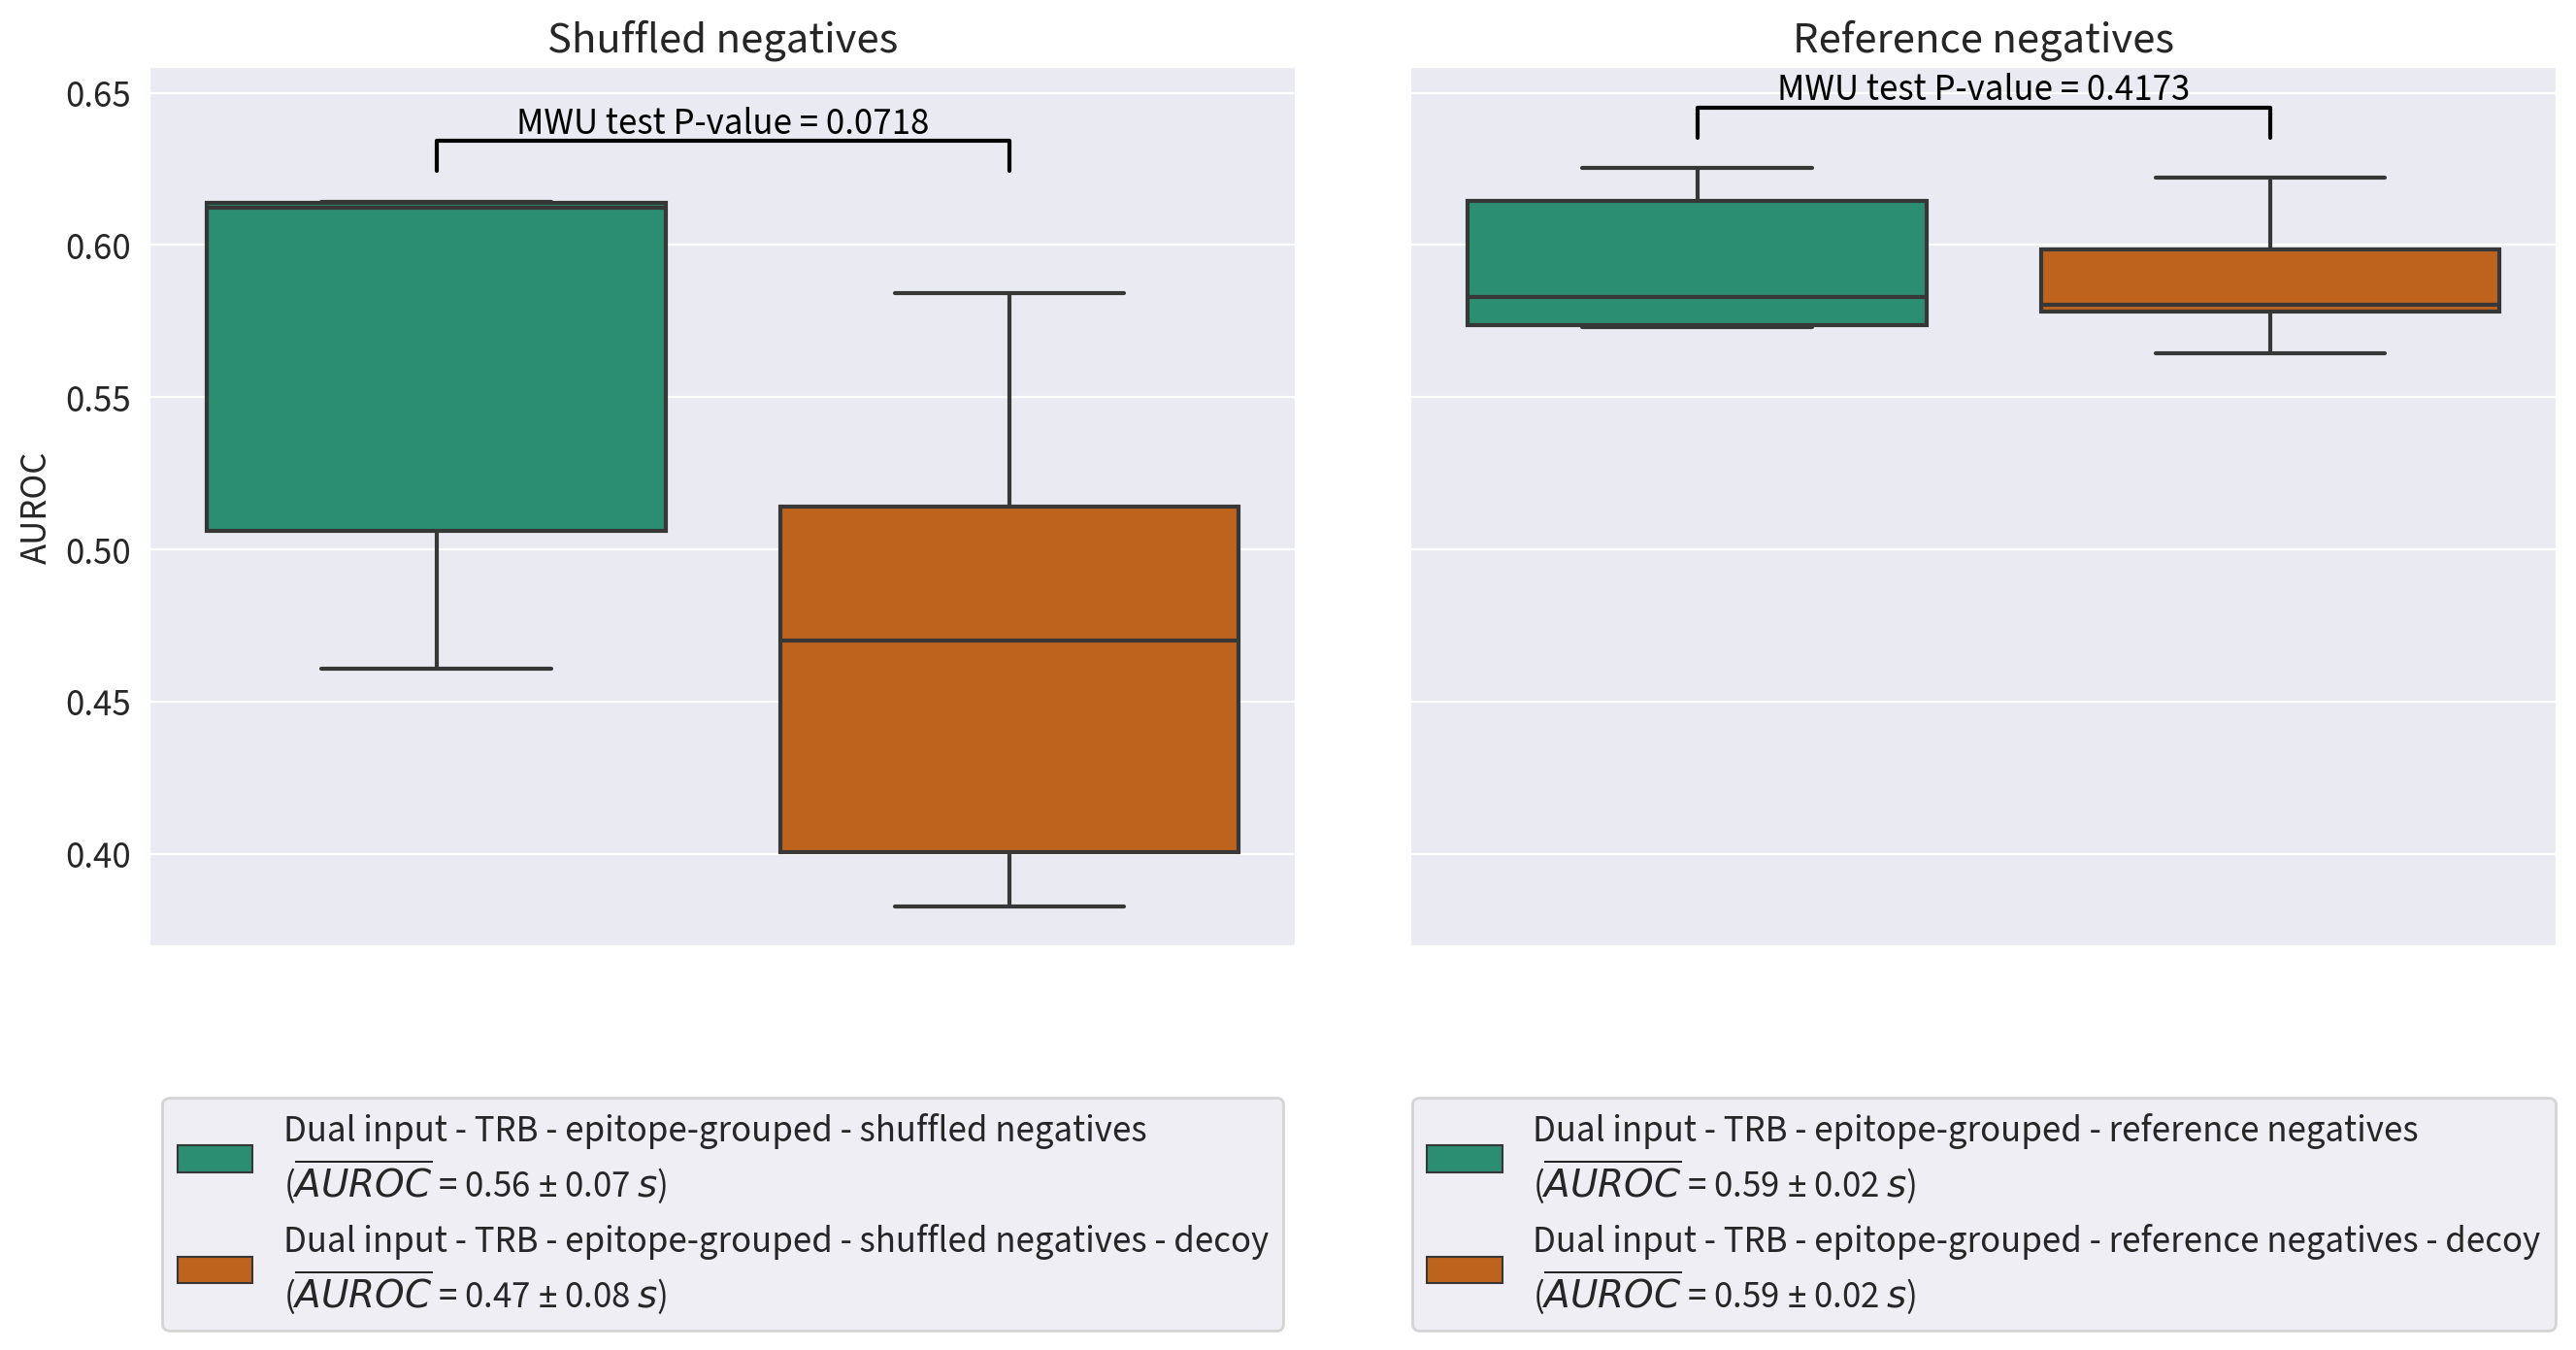

In [201]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(16, 6), dpi=200, constrained_layout=False)

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(negref)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(negref), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[1],
    dodge=False
)
axes[1].set_title("Reference negatives")

sns.boxplot(
    x="type-mean-std",
    y="auc",
    data=df.loc[df["type"].isin(shuffle)].sort_values(by=["type-mean-std"]),
    order=sorted(df.loc[df["type"].isin(shuffle), "type-mean-std"].unique()),
    palette=pal,
    hue="type-mean-std",
    ax=axes[0],
    dodge=False
)
axes[0].set_title("Shuffled negatives")

for ax in axes:
#     plt.setp(ax.get_xticklabels(), rotation=45, va="top", rotation_mode="default")
    ax.set_xlabel(None)
    ax.legend(title=None, loc="upper center", bbox_to_anchor=(0.5, -0.15))
    ax.set_xticks([])

axes[0].set_ylabel("AUROC")
plt.ylabel(None)
plt.subplots_adjust(wspace=0.1)

# plt.setp(axes, ylim=(0.39,0.66))


# Compute p-values

## shuffle

# sort the values
df_shuffle = df.loc[df["type"].isin(shuffle)].sort_values(["iteration", "type"]).reset_index(drop=True)
# and calculate the difference in auroc between the model types per iteration
# df_shuffle["diff"] = df_shuffle.groupby("iteration")["auc"].transform(lambda x: x.diff())

# # wilcoxon signed rank test
# # compute wilcoxon test and add p-value to legend
# p = scipy.stats.wilcoxon(df_shuffle["diff"].dropna(), correction=True, mode="exact")[1]
# # ax.legend(title=r"Wilcoxon signed-rank test $P-value =$ " + str(round(p, 4)),)

# # sign test
# x = (df_shuffle["diff"].dropna() > 0).sum()
# n = len(df_shuffle["diff"].dropna())
# p = scipy.stats.binom_test(x, n, 0.5, alternative="two-sided")
# # ax.legend(title=f"Sign test {p}")

# MWU test
auroc_lists = [df_shuffle.loc[df_shuffle["type"] == i, "auc"] for i in df_shuffle["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[0].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks()) use dodge=False to line up
y, h, col = df_shuffle.auc.max() + .01, .01, 'k'
axes[0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[0].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)


## negref
df_negref = df.loc[df["type"].isin(negref)].sort_values(["iteration", "type"]).reset_index(drop=True)
# df_negref["diff"] = df_negref.groupby("iteration")["auc"].transform(lambda x: x.diff())
auroc_lists = [df_negref.loc[df_negref["type"] == i, "auc"] for i in df_negref["type"].unique()]
p = scipy.stats.mannwhitneyu(auroc_lists[0], auroc_lists[1])[1]
# axes[1].legend(title=f"MWU test P-value = {round(p,4)}", loc="upper center", bbox_to_anchor=(0.5, -0.15))
x1, x2 = 0, 1
y, h, col = df_negref.auc.max() + .01, .01, 'k'
axes[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axes[1].text((x1+x2)*.5, y+h, f"MWU test P-value = {round(p,4)}", ha='center', va='bottom', color=col)

plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shufflenegref-dual-decoy-roc-boxplot.pdf")
plt.savefig(PROJECT_ROOT / "reports/figures/trb-epitopegrouped-down-shufflenegref-dual-decoy-roc-boxplot.png")

# Position perturbation

In [2]:
model_file = PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives/iteration_4/2020-06-14_07-50-24_trbmhcidown-epitope_grouped-shuffle-padded-b32-lre4-lrr-epoch30-valacc0.50.h5"
samples, predictions = predict_variations(model_file, "LLFGYPVYV", "CASRPGLAGGRPEQYF", aa="G")

Generating variations with up to 1 changes
=============== All results ===============
LLFGYPVYV CASRPGLAGGRPEQYF 0.53084
GLFGYPVYV CASRPGLAGGRPEQYF 0.44750583
LGFGYPVYV CASRPGLAGGRPEQYF 0.49353254
LLGGYPVYV CASRPGLAGGRPEQYF 0.49176887
LLFGYPVYV CASRPGLAGGRPEQYF 0.53084
LLFGGPVYV CASRPGLAGGRPEQYF 0.50342995
LLFGYGVYV CASRPGLAGGRPEQYF 0.51265854
LLFGYPGYV CASRPGLAGGRPEQYF 0.4989922
LLFGYPVGV CASRPGLAGGRPEQYF 0.5082963
LLFGYPVYG CASRPGLAGGRPEQYF 0.52559435
LLFGYPVYV GASRPGLAGGRPEQYF 0.53109086
LLFGYPVYV CGSRPGLAGGRPEQYF 0.5315626
LLFGYPVYV CAGRPGLAGGRPEQYF 0.54058343
LLFGYPVYV CASGPGLAGGRPEQYF 0.5225445
LLFGYPVYV CASRGGLAGGRPEQYF 0.5194867
LLFGYPVYV CASRPGLAGGRPEQYF 0.53084
LLFGYPVYV CASRPGGAGGRPEQYF 0.5247363
LLFGYPVYV CASRPGLGGGRPEQYF 0.51667297
LLFGYPVYV CASRPGLAGGRPEQYF 0.53084
LLFGYPVYV CASRPGLAGGRPEQYF 0.53084
LLFGYPVYV CASRPGLAGGGPEQYF 0.50360286
LLFGYPVYV CASRPGLAGGRGEQYF 0.5383662
LLFGYPVYV CASRPGLAGGRPGQYF 0.49150464
LLFGYPVYV CASRPGLAGGRPEGYF 0.48953027
LLFGYPVYV CASRPGLAGGRPE

In [3]:
predictions

array([0.53084   , 0.44750583, 0.49353254, 0.49176887, 0.53084   ,
       0.50342995, 0.51265854, 0.4989922 , 0.5082963 , 0.52559435,
       0.53109086, 0.5315626 , 0.54058343, 0.5225445 , 0.5194867 ,
       0.53084   , 0.5247363 , 0.51667297, 0.53084   , 0.53084   ,
       0.50360286, 0.5383662 , 0.49150464, 0.48953027, 0.5189627 ,
       0.497133  ], dtype=float32)

In [5]:
samples[10:]

[('LLFGYPVYV', 'GASRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CGSRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CAGRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASGPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRGGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGGAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGLGGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGGPEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRGEQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPGQYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEGYF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEQGF'),
 ('LLFGYPVYV', 'CASRPGLAGGRPEQYG')]

In [6]:
import seaborn as sns

In [10]:
"GASRPGLAGGRPEQYF".index("G")

0

IndexError: too many indices for array

In [40]:
[str(i) + str(j) for i,j in enumerate(list("CASRPGLAGGRPEQYF"))]

['0C',
 '1A',
 '2S',
 '3R',
 '4P',
 '5G',
 '6L',
 '7A',
 '8G',
 '9G',
 '10R',
 '11P',
 '12E',
 '13Q',
 '14Y',
 '15F']

In [78]:
df = pd.DataFrame({'predictions': predictions[10:], 'samples': samples[10:], "position": ["position " + str(i+1) + " - " + "AA " + str(j) for i,j in enumerate(list("CASRPGLAGGRPEQYF"))]})
# df = df.append({'predictions': predictions[0], 'samples': samples[0], "position": "unchanged"}, ignore_index=True)

In [79]:
#df["position"] = df["samples"].apply(lambda x: x[1].index("G"))

In [80]:
[i for i in range(len("CASRPGLAGGRPEQYF"))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [81]:
df["predictions"]

0     0.531091
1     0.531563
2     0.540583
3     0.522545
4     0.519487
5     0.530840
6     0.524736
7     0.516673
8     0.530840
9     0.530840
10    0.503603
11    0.538366
12    0.491505
13    0.489530
14    0.518963
15    0.497133
Name: predictions, dtype: float32

In [82]:
df["position"]

0      position 1 - AA C
1      position 2 - AA A
2      position 3 - AA S
3      position 4 - AA R
4      position 5 - AA P
5      position 6 - AA G
6      position 7 - AA L
7      position 8 - AA A
8      position 9 - AA G
9     position 10 - AA G
10    position 11 - AA R
11    position 12 - AA P
12    position 13 - AA E
13    position 14 - AA Q
14    position 15 - AA Y
15    position 16 - AA F
Name: position, dtype: object

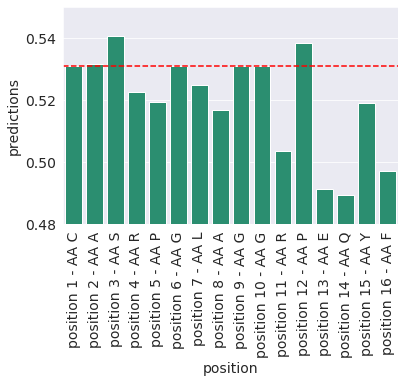

In [83]:
ax = sns.barplot(y="predictions", x="position", data=df, color=sns.color_palette("Dark2")[0])
ax.set(ylim=(0.48, 0.55))
plt.setp(ax.get_xticklabels(), rotation=90, va="top", rotation_mode="default")
ax.axhline(predictions[0], ls='--', color="red")

In [104]:
[i for i in enumerate(Path(PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives").glob("**/*epoch30*.h5"))]

[(0,
  PosixPath('/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives/iteration_0/2020-06-14_07-50-24_trbmhcidown-epitope_grouped-shuffle-padded-b32-lre4-lrr-epoch30-valacc0.55.h5')),
 (1,
  PosixPath('/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives/iteration_1/2020-06-14_07-50-24_trbmhcidown-epitope_grouped-shuffle-padded-b32-lre4-lrr-epoch30-valacc0.57.h5')),
 (2,
  PosixPath('/media/pieter/DATA/Wetenschap/Doctoraat/projects/deepTCR/deepTCR/models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives/iteration_2/2020-06-14_07-50-24_trbmhcidown-epitope_grouped-shuffle-padded-b32-lre4-lrr-epoch30-vala

Generating variations with up to 1 changes
=============== All results ===============
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
GLFGYPVYV CASRPGLAGGRPEQYF 0.6117452
LGFGYPVYV CASRPGLAGGRPEQYF 0.63502616
LLGGYPVYV CASRPGLAGGRPEQYF 0.6016137
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGGPVYV CASRPGLAGGRPEQYF 0.5796573
LLFGYGVYV CASRPGLAGGRPEQYF 0.6348323
LLFGYPGYV CASRPGLAGGRPEQYF 0.6376696
LLFGYPVGV CASRPGLAGGRPEQYF 0.60104764
LLFGYPVYG CASRPGLAGGRPEQYF 0.6461688
LLFGYPVYV GASRPGLAGGRPEQYF 0.6345018
LLFGYPVYV CGSRPGLAGGRPEQYF 0.6654995
LLFGYPVYV CAGRPGLAGGRPEQYF 0.64449996
LLFGYPVYV CASGPGLAGGRPEQYF 0.61058104
LLFGYPVYV CASRGGLAGGRPEQYF 0.63963634
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGGAGGRPEQYF 0.6223919
LLFGYPVYV CASRPGLGGGRPEQYF 0.64021045
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGLAGGGPEQYF 0.55744696
LLFGYPVYV CASRPGLAGGRGEQYF 0.61920875
LLFGYPVYV CASRPGLAGGRPGQYF 0.6098639
LLFGYPVYV CASRPGLAGGRPEGYF 0.64992213
LLFGYPVYV C

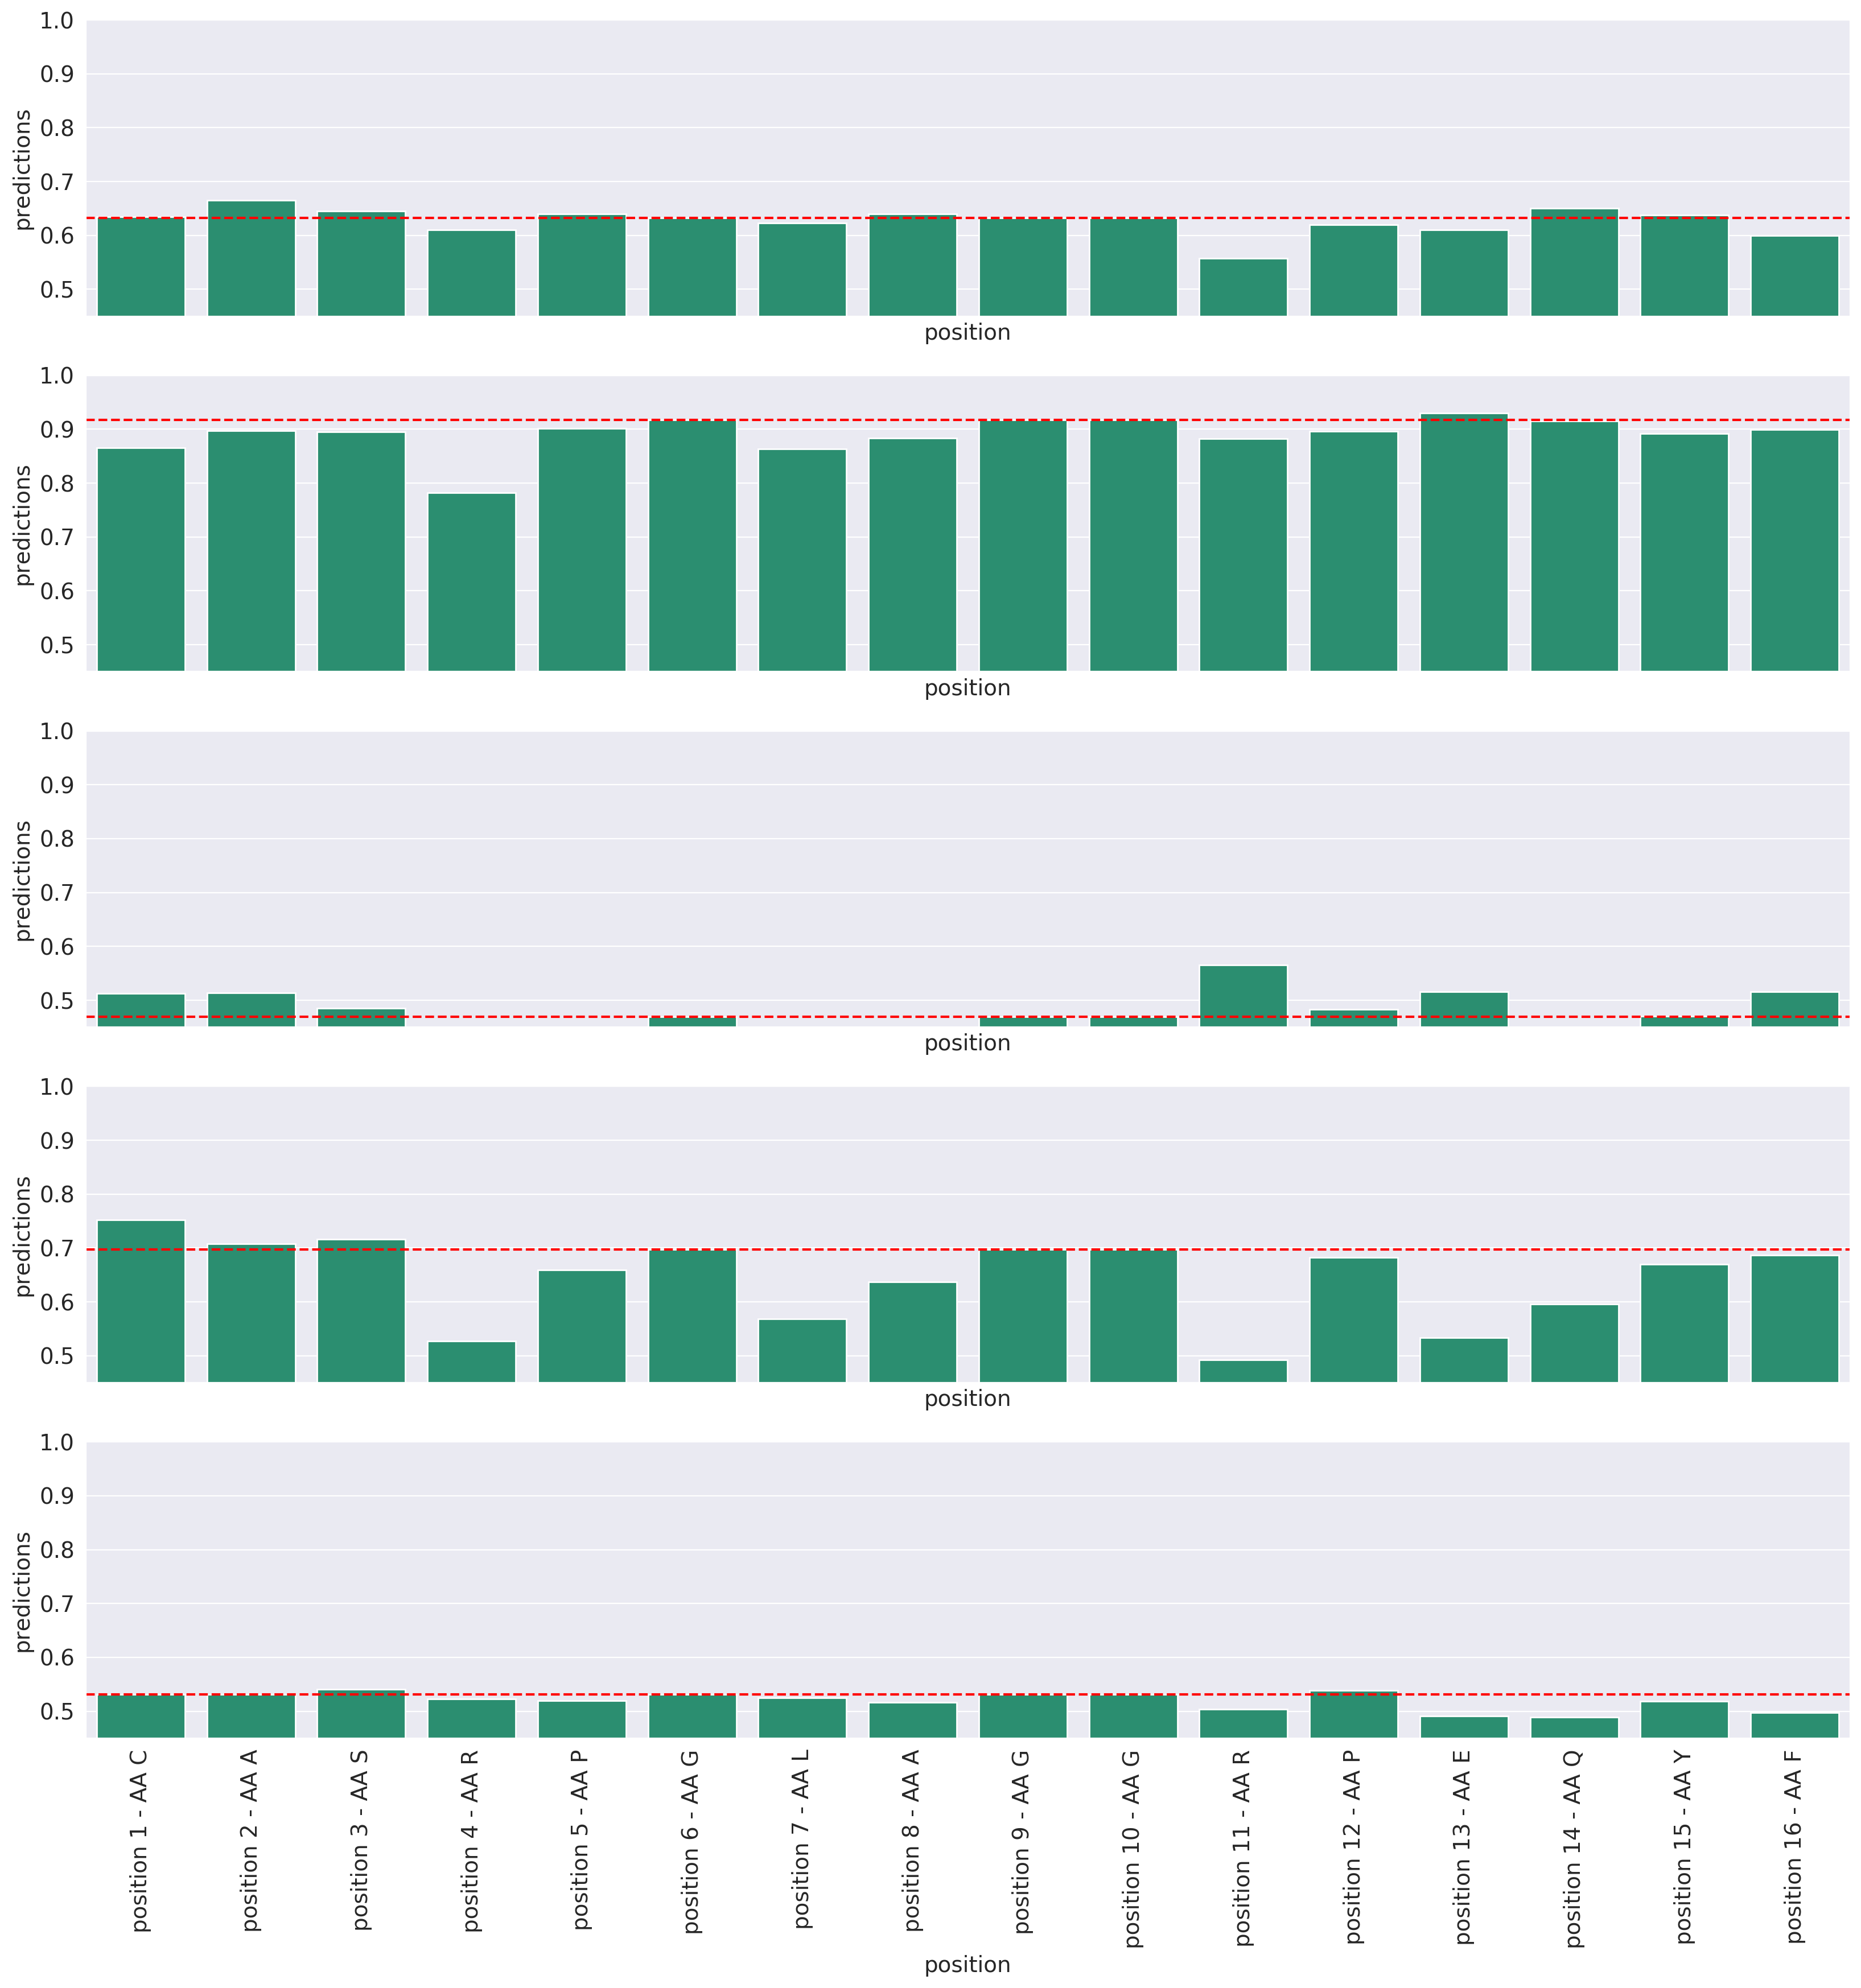

In [106]:
fig, axs = plt.subplots(5, 1, constrained_layout=False, dpi=200, figsize=(20, 20), sharex=True)

for i, model_file in enumerate(Path(PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives").glob("**/*epoch30*.h5")):
    samples, predictions = predict_variations(model_file, "LLFGYPVYV", "CASRPGLAGGRPEQYF", aa="G")
    df = pd.DataFrame({'predictions': predictions[10:], 'samples': samples[10:], "position": ["position " + str(i+1) + " - " + "AA " + str(j) for i,j in enumerate(list("CASRPGLAGGRPEQYF"))]})
    g = sns.barplot(y="predictions", x="position", data=df, color=sns.color_palette("Dark2")[0], ax=axs[i])
    axs[i].set(ylim=(0.45, 1))
#     g.set(xticklabels=[])
#     g.set(xlabel=None)
    axs[i].axhline(predictions[0], ls='--', color="red")
    plt.setp(axs[i].get_xticklabels(), rotation=90, va="top", rotation_mode="default")
plt.show()

Generating variations with up to 1 changes
=============== All results ===============
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
GLFGYPVYV CASRPGLAGGRPEQYF 0.6117452
LGFGYPVYV CASRPGLAGGRPEQYF 0.63502616
LLGGYPVYV CASRPGLAGGRPEQYF 0.6016137
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGGPVYV CASRPGLAGGRPEQYF 0.5796573
LLFGYGVYV CASRPGLAGGRPEQYF 0.6348323
LLFGYPGYV CASRPGLAGGRPEQYF 0.6376696
LLFGYPVGV CASRPGLAGGRPEQYF 0.60104764
LLFGYPVYG CASRPGLAGGRPEQYF 0.6461688
LLFGYPVYV GASRPGLAGGRPEQYF 0.6345018
LLFGYPVYV CGSRPGLAGGRPEQYF 0.6654995
LLFGYPVYV CAGRPGLAGGRPEQYF 0.64449996
LLFGYPVYV CASGPGLAGGRPEQYF 0.61058104
LLFGYPVYV CASRGGLAGGRPEQYF 0.63963634
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGGAGGRPEQYF 0.6223919
LLFGYPVYV CASRPGLGGGRPEQYF 0.64021045
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGLAGGRPEQYF 0.63268995
LLFGYPVYV CASRPGLAGGGPEQYF 0.55744696
LLFGYPVYV CASRPGLAGGRGEQYF 0.61920875
LLFGYPVYV CASRPGLAGGRPGQYF 0.6098639
LLFGYPVYV CASRPGLAGGRPEGYF 0.64992213
LLFGYPVYV C

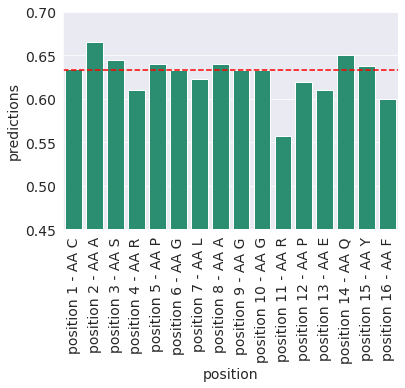

In [85]:
model_file = PROJECT_ROOT / "models/models-calcua-final/comparisons/trb-epitopegrouped-down-shuffle-map-dual/Interaction map - TRB - epitope-grouped - shuffled negatives/iteration_0/2020-06-14_07-50-24_trbmhcidown-epitope_grouped-shuffle-padded-b32-lre4-lrr-epoch30-valacc0.55.h5"
samples, predictions = predict_variations(model_file, "LLFGYPVYV", "CASRPGLAGGRPEQYF", aa="G")
df = pd.DataFrame({'predictions': predictions[10:], 'samples': samples[10:], "position": ["position " + str(i+1) + " - " + "AA " + str(j) for i,j in enumerate(list("CASRPGLAGGRPEQYF"))]})
ax = sns.barplot(y="predictions", x="position", data=df, color=sns.color_palette("Dark2")[0])
ax.set(ylim=(0.45, 0.70))
plt.setp(ax.get_xticklabels(), rotation=90, va="top", rotation_mode="default")
ax.axhline(predictions[0], ls='--', color="red")